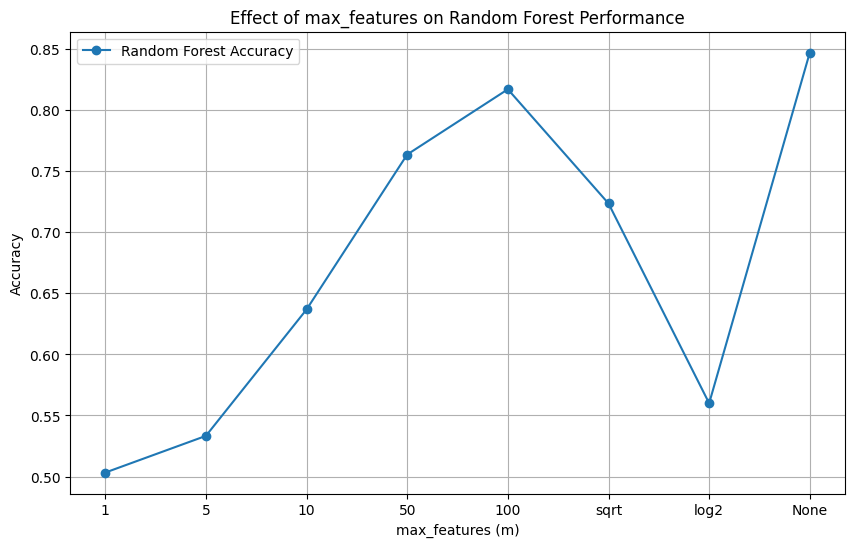

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
# 1000 samples, 1000 features, but only 10 are informative
X, y = make_classification(
    n_samples=1000,
    n_features=1000,
    n_informative=10,  # Only 10 features are relevant
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=42,
)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vary `max_features` (m) for Random Forest
max_features_values = [1, 5, 10, 50, 100, 'sqrt', 'log2', None]
accuracies = []

for max_features in max_features_values:
    rf = RandomForestClassifier(n_estimators=100, max_features=max_features, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(
    [str(m) for m in max_features_values],
    accuracies,
    marker='o',
    label="Random Forest Accuracy",
)
plt.title("Effect of max_features on Random Forest Performance")
plt.xlabel("max_features (m)")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()